# Predicting Breast cancer
## Capstone Project for Data Science Incubator
### Notebook by Debisree Ray

## Introduction:

### 1. The Problem:

Breast cancer is one of the fatal diseases for women worldwide, if not detected at an early stage. Here the goal of the project is to build a classification algorithm, which will identify the cancerous sample from the FNA images of the patients.  The features are extracted/calculated from the digital photos, and then a classification model has been built. With the algorithm, an unknown data could be classified with particular precision and accuracy.

### 2. The Data:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Ten real-valued features are computed for each cell nucleus.


This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

* **ID number:** Unique identifer of case IDs.
* **Diagnosis:** This is the target variable. This is a binary classification model, where M = malignant and B = benign 

3-32)

Ten real-valued features are computed for each cell nucleus:
* **radius:** mean of distances from center to points on the perimeter
* **texture:** standard deviation of gray-scale values 
* **perimeter:** calucalted from the radius
* **area:** calculated from the radius
* **smoothness:** local variation in radius lengths
* **compactness:** perimeter^2 / area - 1.0 
* **concavity:** severity of concave portions of the contour
* **concave points:** number of concave portions of the contour 
* **symmetry:**
* **fractal dimension:** "coastline approximation" - 1

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.



In [1]:
import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [42]:
# read in the data and check the first 5 rows
df = pd.read_csv('data.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [45]:
# remove the 'Unnamed: 32' column
df = df.drop('Unnamed: 32', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2. Exploratory Data Analysis:
### 2.1 Diagnosis (Target variable):

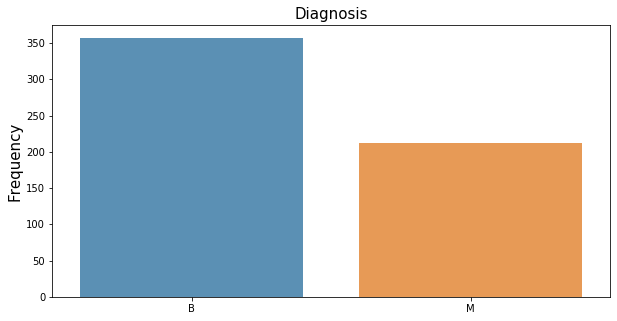

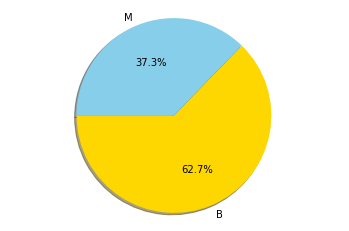

In [46]:
d=df['diagnosis'].value_counts()

#Visually:
#Visual display for canceled vs. not canceled:

plt.figure(figsize=(10,5))

_= sns.barplot(d.index,d.values,alpha=0.8)
plt.title('Diagnosis',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
#plt.xticks([1, 0], ['Not canceled','Canceled'],fontsize=15)
plt.savefig("1.png")
#plt.xlabel('', fontsize=12)
plt.show()



#pie plot showing the canceled vs. not canceled:

labels = 'B','M'
sizes = [357, 212]
colors = ['Gold', 'skyblue']
explode = (0, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.savefig("2.png")
plt.axis('equal')
plt.show()

* 62.7% of the data is of benign case
* 37.3% is malignant.
* So, there is no major class imbalance.

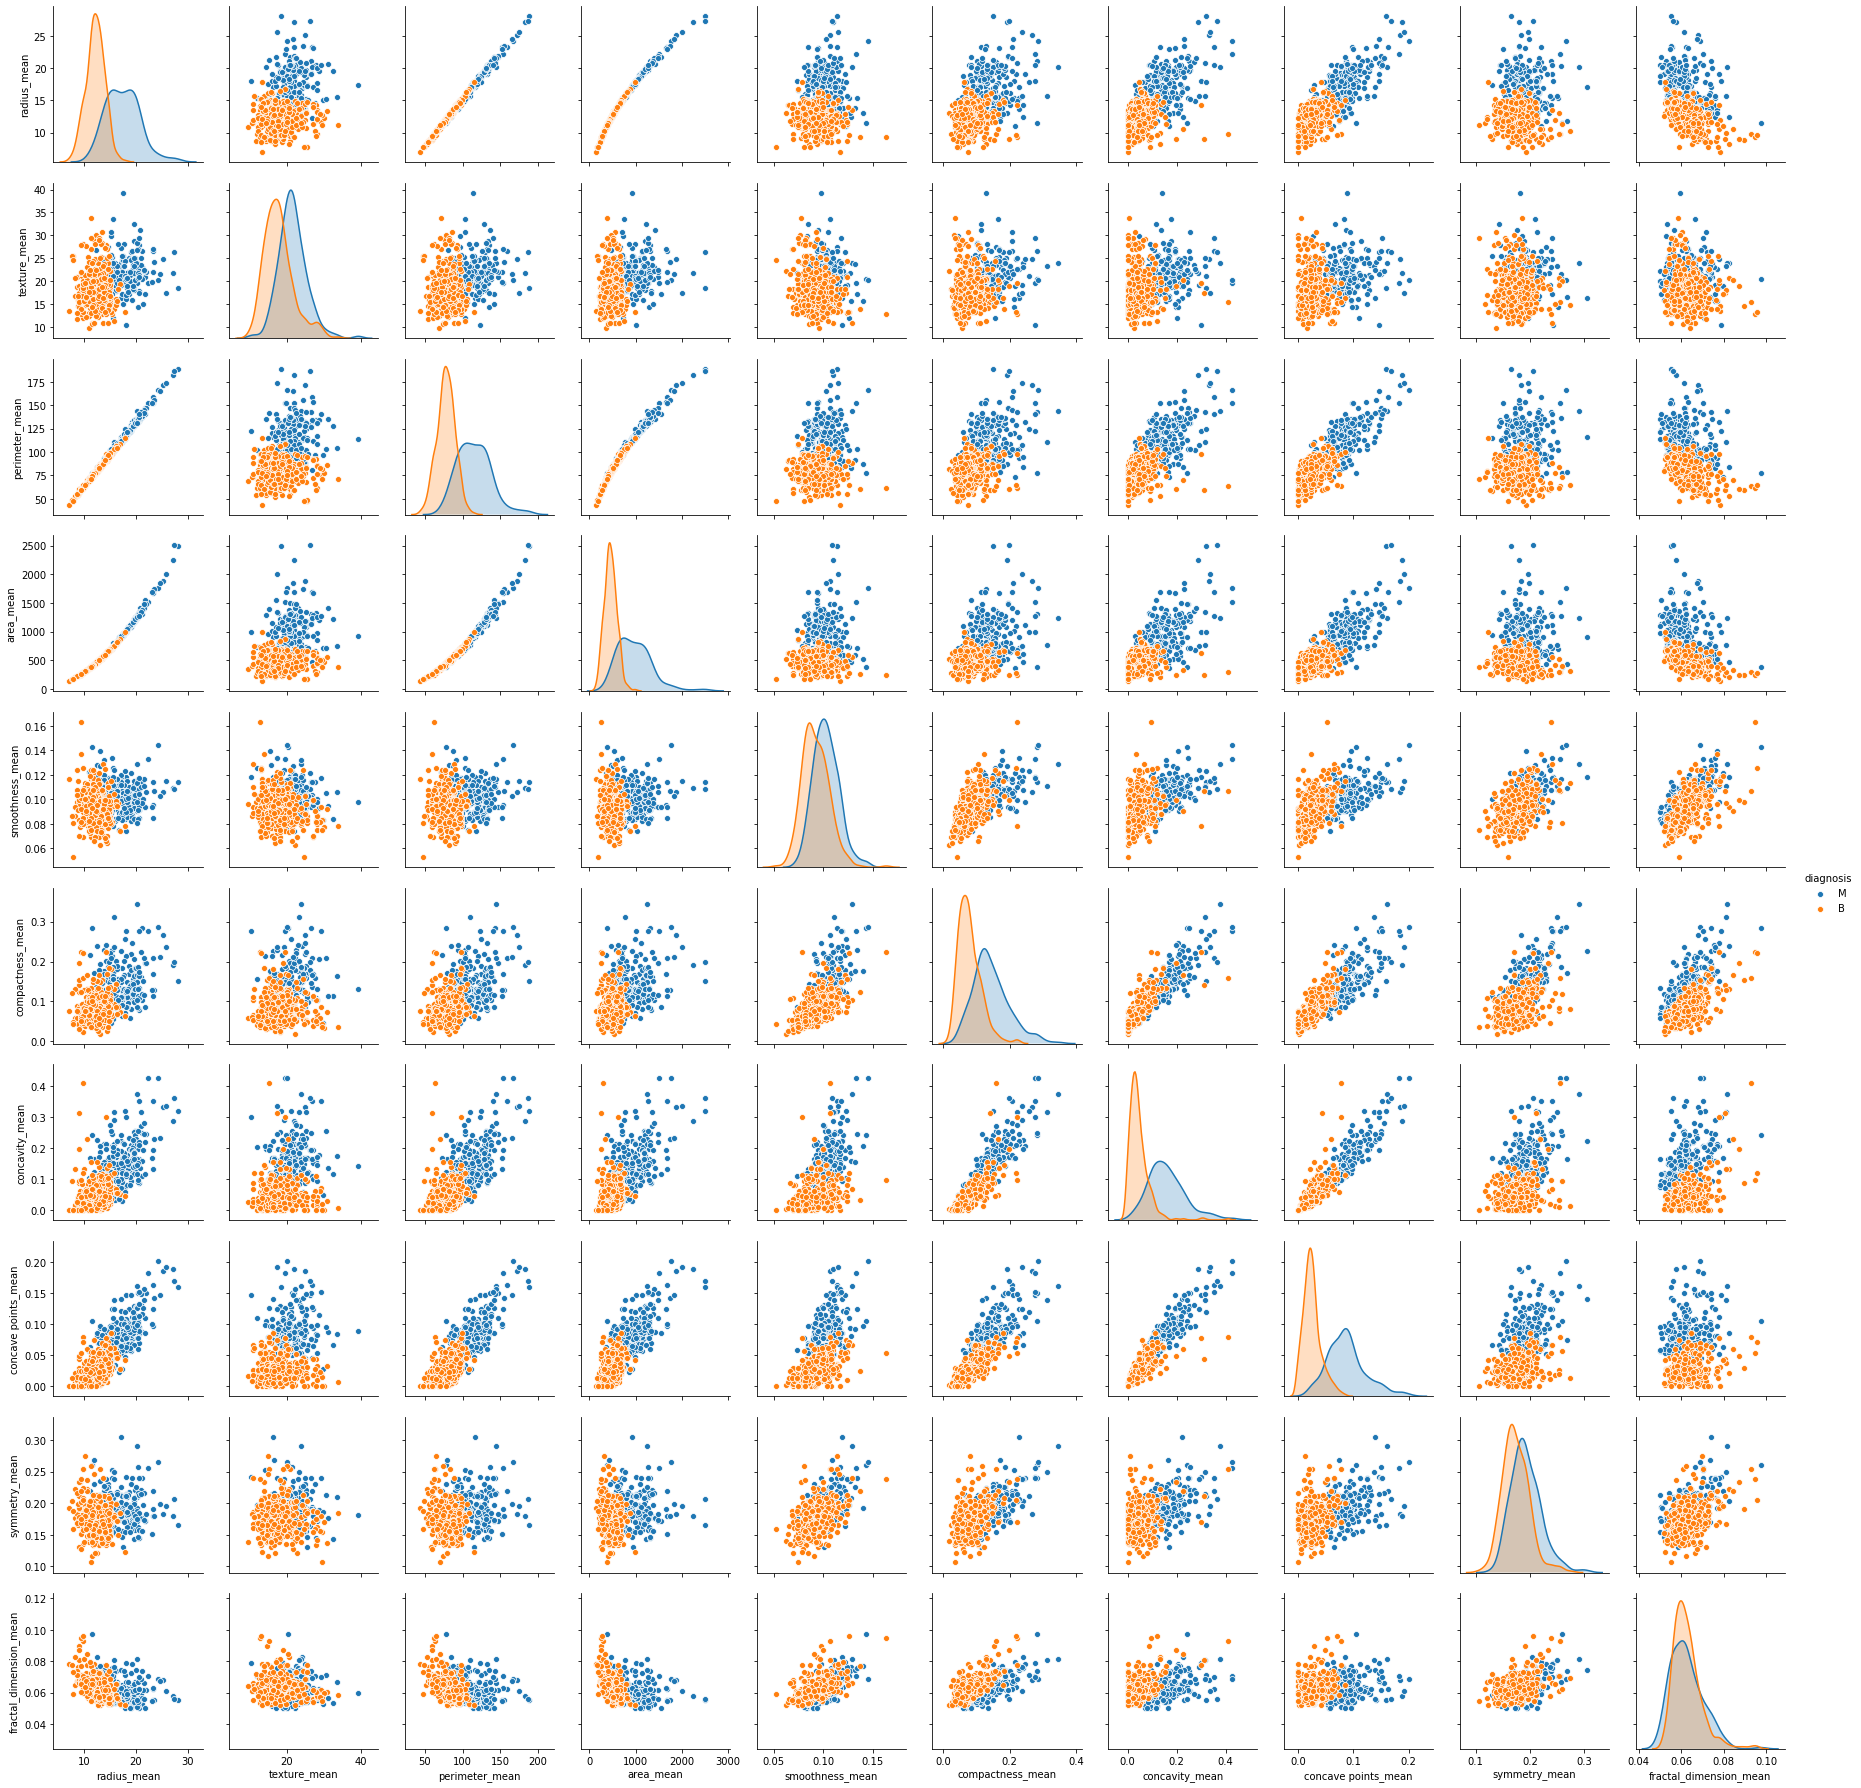

In [47]:
# generate a scatter plot matrix with the "mean" columns:

cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis')
plt.savefig("4.png")

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the **radius**, **perimeter** and **area** attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the **concavity**, **concave_points** and **compactness**.

Let's take a look at the correlations between our variables. This time however, we will create a correlation matrix with all variables (i.e., the "mean" columns, the "standard errors" columns, as well as the "worst" columns).

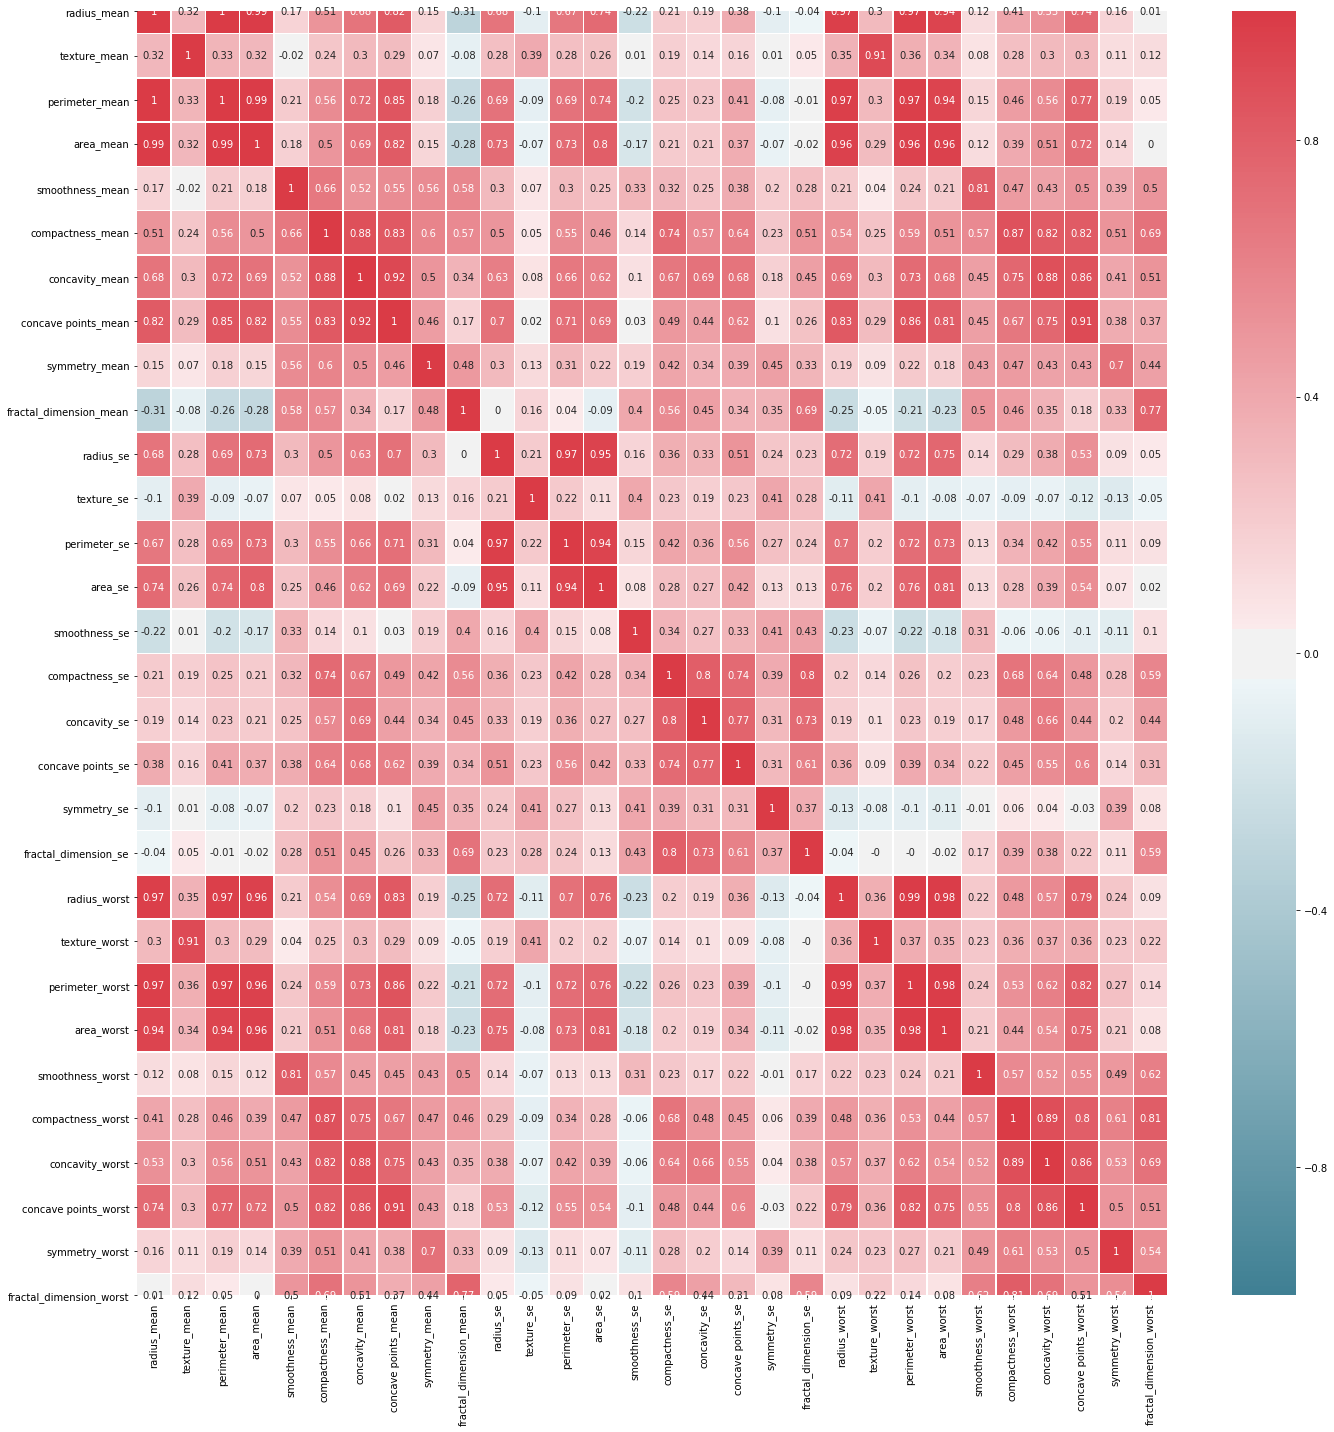

In [48]:
plt.figure(figsize=(20,20))
corr = df.corr().round(2)
# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, cmap= cmap, vmin=-1, vmax=1, 
            center=0,yticklabels=corr.columns.values,linewidths=.5, annot=True)
plt.savefig("5.png")
plt.tight_layout()
plt.show()

* We can see the presence of multicollinearity. The radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis. So, we will keep the radius_mean and drop the rest.

* Similarly, there is multicollinearity between the attributes compactness, concavity, and concave points. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell. Let us keep the feature compactness and drop the rest of the two.

* Another place where the multicollienartiy is visiable is between the "mean" columns and the "worst" columns. For instance, the radius_mean column has a correlation of 0.97 with the radius_worst column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is because of the fact that the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, we will drop the 'worst' columns.


In [49]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se',
        'concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)



# verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

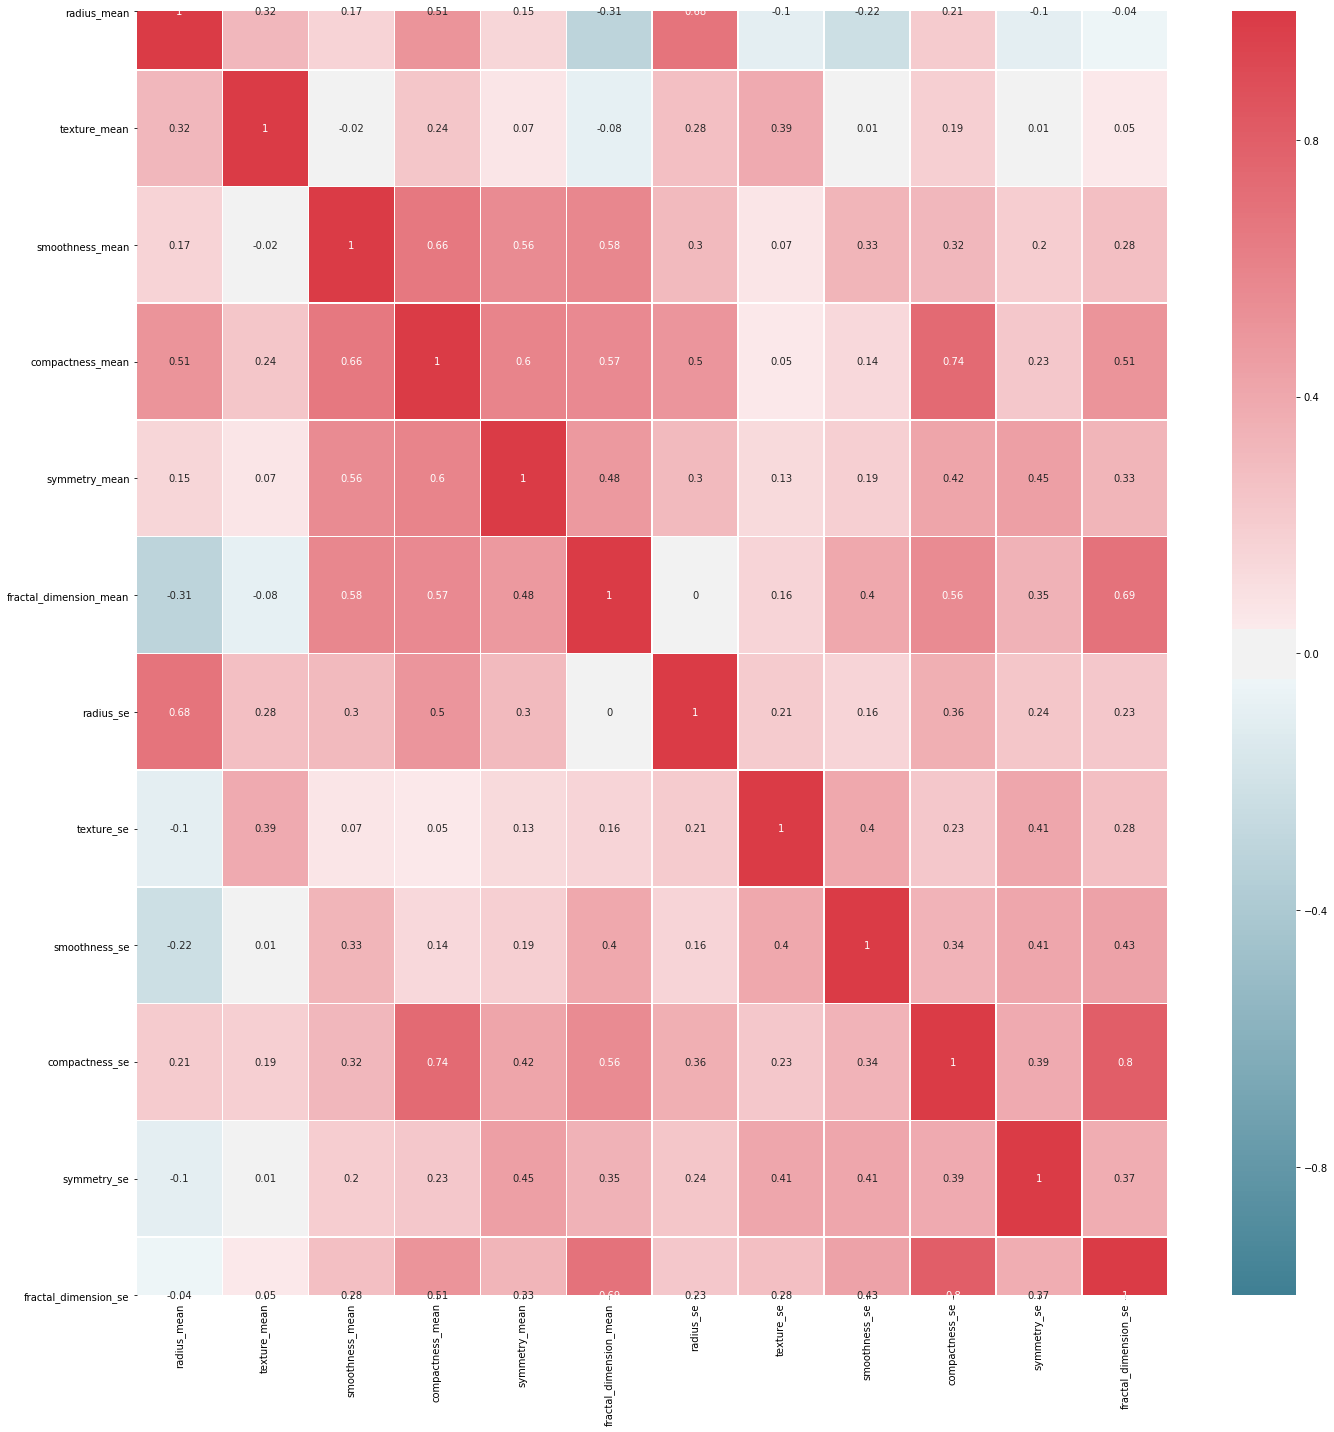

In [50]:
# Draw the heatmap again, with the new correlation matrix:




plt.figure(figsize=(20,20))
corr = df.corr().round(2)
# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, cmap= cmap, vmin=-1, vmax=1, 
            center=0,yticklabels=corr.columns.values,linewidths=.5, annot=True)
plt.savefig("6.png")
plt.tight_layout()
plt.show()

### Modeling:

Now we are ready to apply ML algorithms.

In [39]:
features_cols = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se']

features = df[features_cols]

y = df.diagnosis

In [40]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.learning_curve import validation_curve

from sklearn.model_selection import learning_curve, GridSearchCV

# Splitting the dataset into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling:

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

NameError: name 'X' is not defined